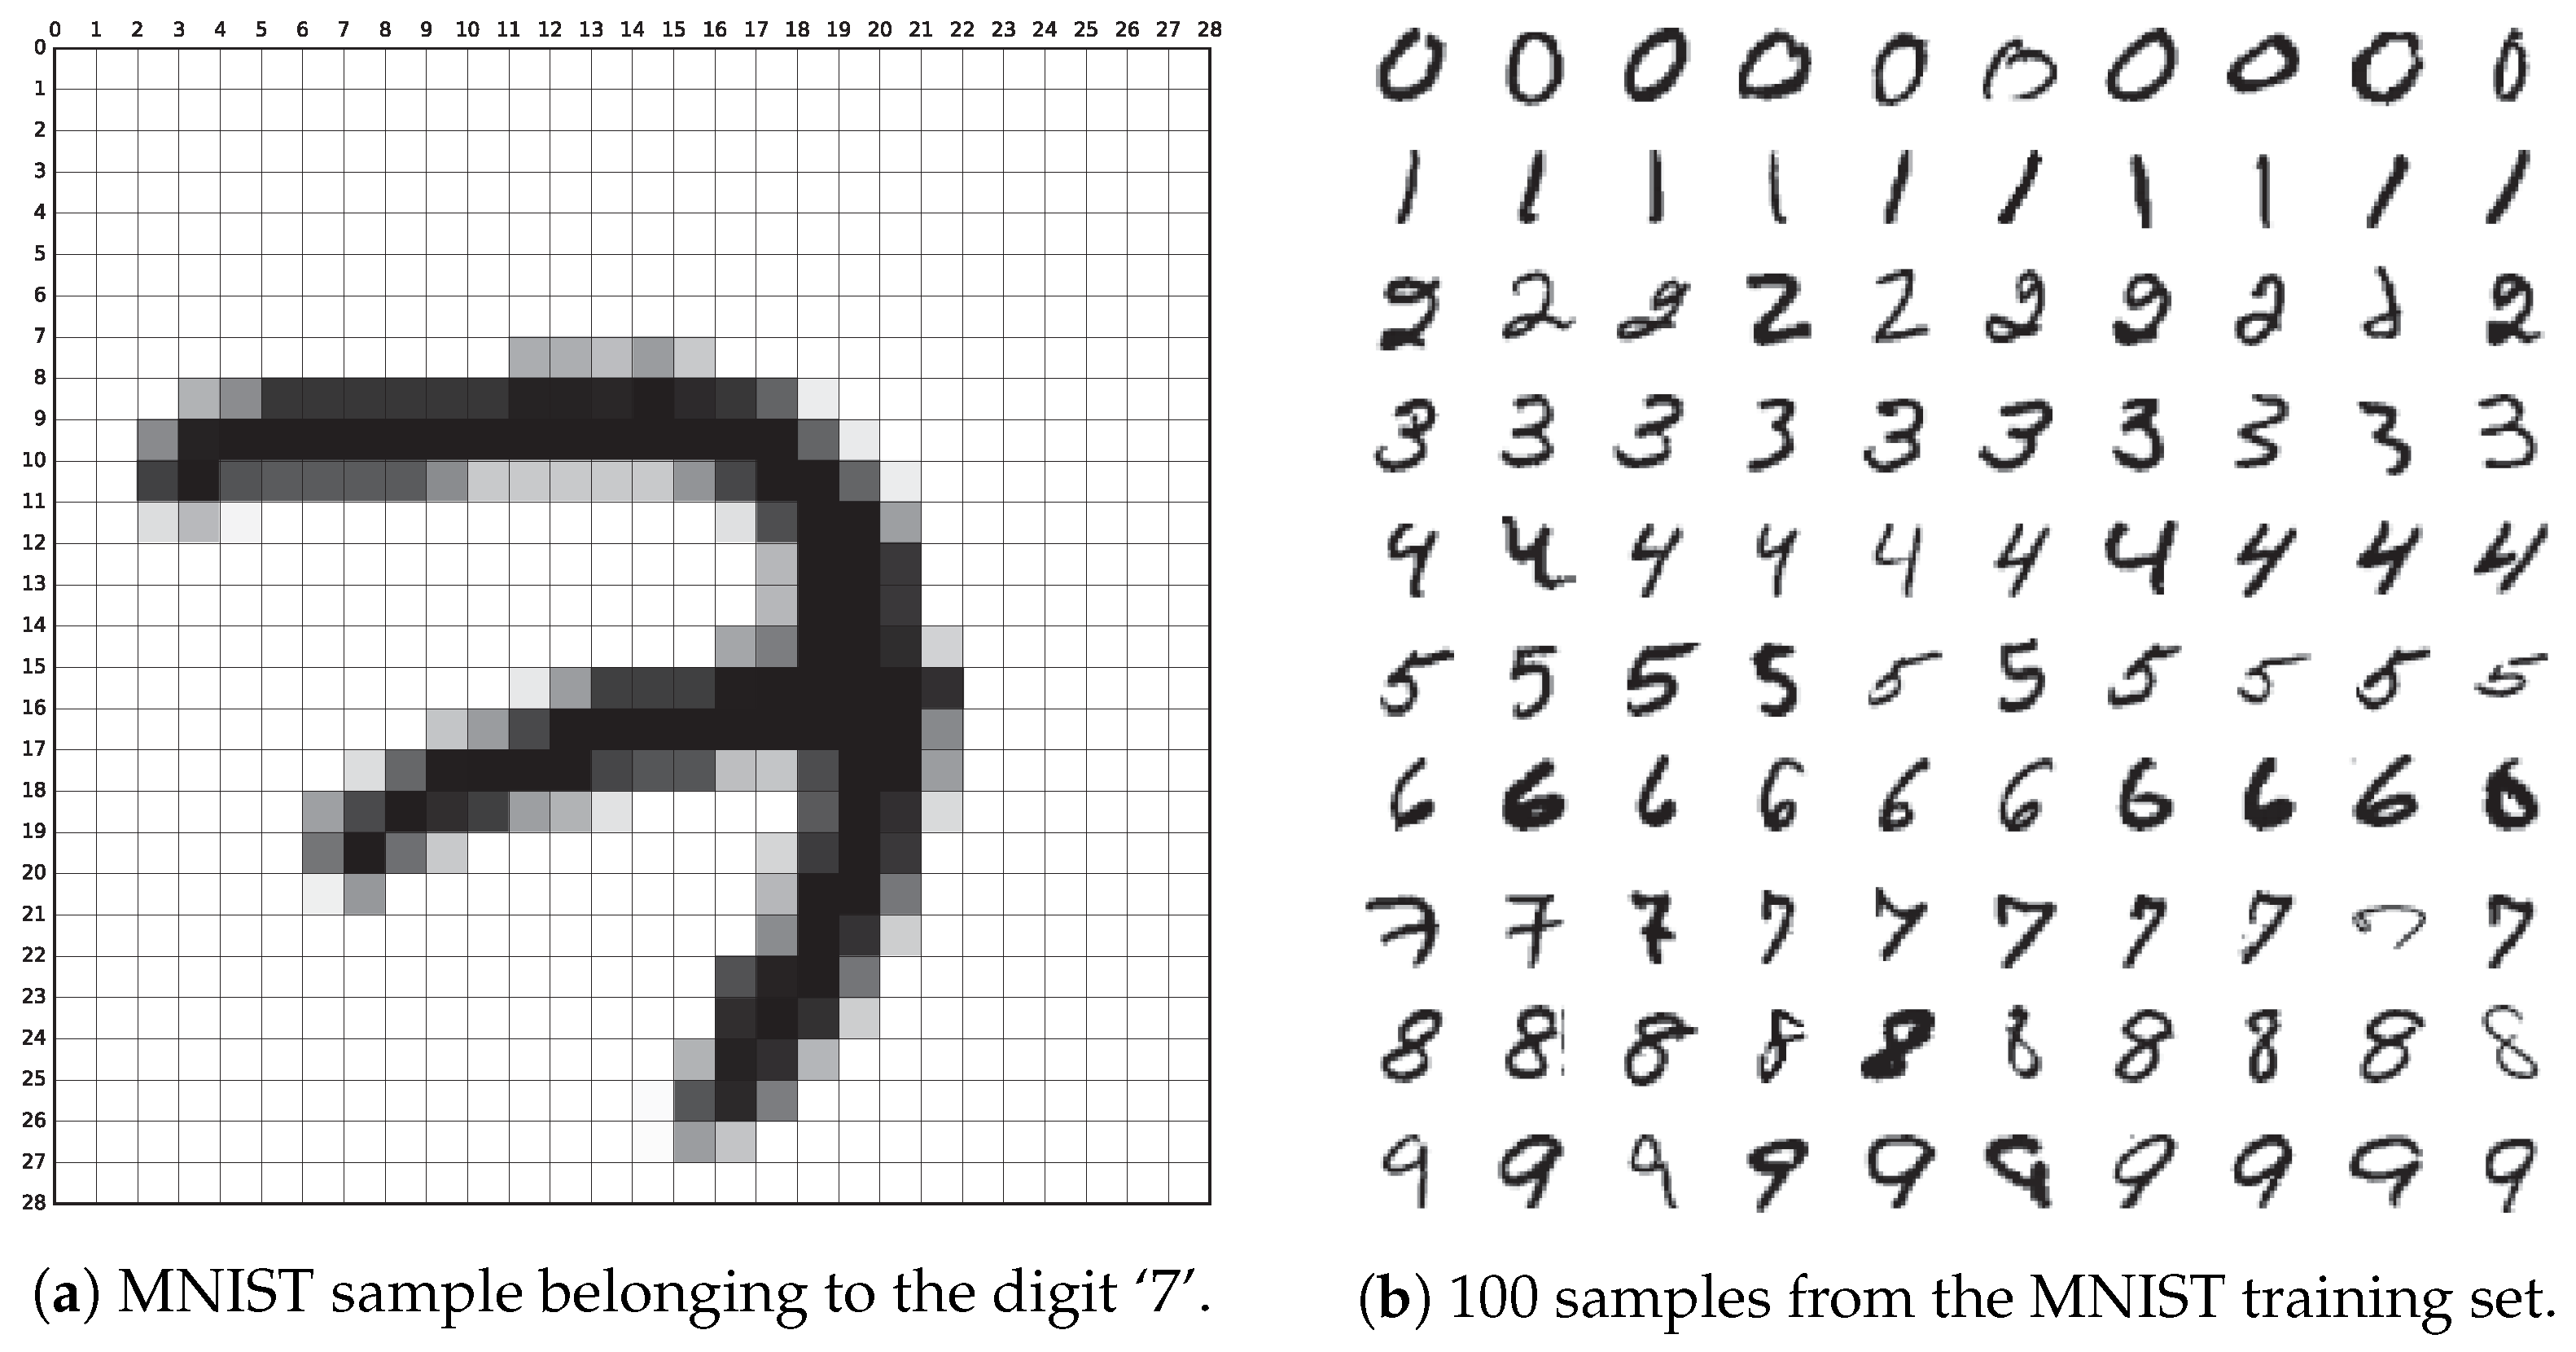

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

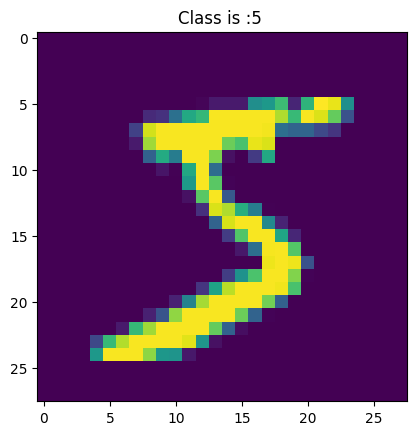

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.title(f"Class is :{y_train[0]} ")
plt.show()

In [7]:
import numpy as np
np.array_str(X_train[0], max_line_width=220)

'[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]\n [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]\n [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]\n [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 2

In [8]:
np.max(X_train[0])

# For image data, X_train[0]represent pixel values. The max value can help determine if the image is scaled correctly 
# (e.g., between 0 and 255 for standard images, or between 0 and 1 for normalized images).

255

In [9]:
np.min(X_train[0])

0

In [10]:
# Normalize the image
X_train = X_train/255.0
X_test = X_test/255.0
np.max(X_train), np.min(X_train)

(1.0, 0.0)

In [11]:
# Why Normalize

# When using the image as it is and passing through a Deep Neural Network, the computation of 
# high numeric values may become more complex.
# To reduce this we can normalize the values to range from 0 to 1.
# In this way, the numbers will be small and the computation becomes easier and faster.
# As the pixel values range from 0 to 256, apart from 0 the range is 255. 
# So dividing all the values by 255 will convert it to range from 0 to 1

In [12]:
# What is flattening ?
# Converting multi-dimensional input (2D) to 1D data

In [13]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Sequential
# The Sequential class from the tensorflow.keras module is a way to build neural networks in a linear and straightforward manner.
# Layers are added one after the other in a sequential order, which means the output of one layer becomes the input to the next layer.

In [14]:
model = Sequential()
# Initializes a sequential model in Keras, which allows you to build a neural network layer by layer in a linear stack.
model.add(Flatten(input_shape=(28,28))) # input layer 
# Flatten converts the 2D input (28x28 pixels) into a 1D array of 784 elements (28 * 28 = 784). 
# This transformation is necessary to connect the input image data to the fully connected layers.

model.add(Dense(units=64, activation='relu')) # hidden layer
# This method is used to add a new layer to your Sequential model.
# The Dense layer is a fully connected neural network layer where each neuron is connected to every neuron in the previous layer.
# The units parameter specifies the number of neurons (or nodes) in this dense layer
# The activation parameter specifies the activation function used by the neurons in this layer.

model.add(Dense(units=64, activation='relu')) # hidden layer

model.add(Dense(units=10, activation='softmax')) # output layer

model.summary()

# inputs to first layer : (784 * 64 ) + 64
# inputs to second layer: (64*64) + 64
# inputs to the output layer: (64*10) +10

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='sgd', 
              loss='SparseCategoricalCrossentropy',    #  Multi class classification
             metrics = ['accuracy'])
 # how the model should optimize, calculate loss, and measure its performance during training.
# The loss function measures how well the model's predictions match the true labels and guides the optimizer on how to update the weights.
# SparseCategoricalCrossentropy is used for multi-class classification problems where the target labels are integers 
 # sgd -  A variation of the gradient descent algorithm where the model's parameters are updated using only a small subset of the training data
 # (a mini-batch) rather than the entire dataset.

In [16]:
# epoch = number of times we want our parameters to be updated...
# batch size = how many number of rows are been passed to the model for each update...

# Total images in Training dataset 60000. batch size = 32. 

# Epoch – The number of times the algorithm runs on the whole training dataset
# In each epoch entire dataset is getting trained in batches of 32 
# and this is happening 15 times....

history = model.fit(X_train, y_train, epochs = 15, batch_size=32)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 381us/step - accuracy: 0.6674 - loss: 1.1810
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - accuracy: 0.9059 - loss: 0.3244
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - accuracy: 0.9236 - loss: 0.2636
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - accuracy: 0.9346 - loss: 0.2278
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 370us/step - accuracy: 0.9425 - loss: 0.2037
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step - accuracy: 0.9477 - loss: 0.1830
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step - accuracy: 0.9517 - loss: 0.1649
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.9570 - loss: 0.1496
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step - accuracy: 0.9597 - loss: 0.1396
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - accuracy: 0.9632 - loss: 0.1292
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 385us/step - accuracy: 0.9641 - loss: 0.1243
Epoch 12

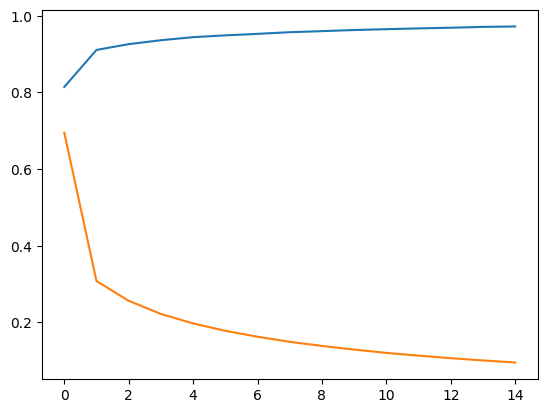

In [17]:
h = history.history
plt.plot(h['accuracy'], label = 'Accuracy')
plt.plot(h['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

In [18]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


array([[3.5055509e-05, 9.9045792e-07, 8.3079125e-05, ..., 9.9737847e-01,
        7.9313704e-06, 5.7222809e-05],
       [1.8388482e-05, 1.2687992e-04, 9.9215323e-01, ..., 6.1280612e-09,
        1.6418872e-04, 6.6181927e-10],
       [2.7270569e-04, 9.8813152e-01, 3.3067591e-03, ..., 3.8949847e-03,
        1.4383900e-03, 1.5218956e-04],
       ...,
       [3.9191278e-08, 1.8293298e-09, 8.1951143e-08, ..., 3.4811754e-05,
        2.6125044e-05, 5.2389246e-04],
       [5.6773169e-06, 1.3937412e-05, 1.9785473e-07, ..., 2.6439281e-07,
        4.7945236e-03, 2.5694152e-07],
       [2.0086789e-05, 3.2228123e-11, 8.3189925e-06, ..., 4.2583666e-11,
        7.2530514e-07, 1.1030447e-08]], dtype=float32)

In [19]:
model.evaluate(X_test,y_test) # loss, accuracy.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.9604 - loss: 0.1273


[0.11106151342391968, 0.9663000106811523]

In [20]:
np.round(y_pred[0],3)

array([0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.997, 0.   ,
       0.   ], dtype=float32)

In [21]:
np.argmax(y_pred[0])

7

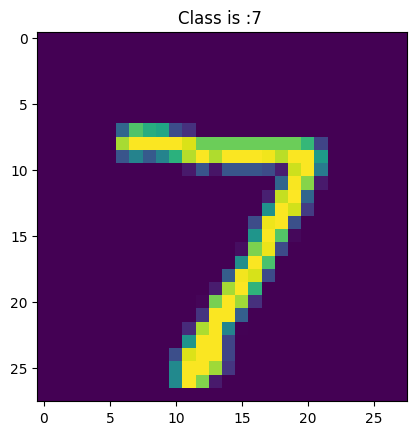

In [22]:
plt.imshow(X_test[0])
plt.title(f"Class is :{y_test[0]} ")
plt.show()

In [23]:
y_pred

array([[3.5055509e-05, 9.9045792e-07, 8.3079125e-05, ..., 9.9737847e-01,
        7.9313704e-06, 5.7222809e-05],
       [1.8388482e-05, 1.2687992e-04, 9.9215323e-01, ..., 6.1280612e-09,
        1.6418872e-04, 6.6181927e-10],
       [2.7270569e-04, 9.8813152e-01, 3.3067591e-03, ..., 3.8949847e-03,
        1.4383900e-03, 1.5218956e-04],
       ...,
       [3.9191278e-08, 1.8293298e-09, 8.1951143e-08, ..., 3.4811754e-05,
        2.6125044e-05, 5.2389246e-04],
       [5.6773169e-06, 1.3937412e-05, 1.9785473e-07, ..., 2.6439281e-07,
        4.7945236e-03, 2.5694152e-07],
       [2.0086789e-05, 3.2228123e-11, 8.3189925e-06, ..., 4.2583666e-11,
        7.2530514e-07, 1.1030447e-08]], dtype=float32)

In [24]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [25]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 968,    0,    1,    3,    0,    2,    3,    1,    2,    0],
       [   0, 1120,    5,    1,    0,    1,    2,    2,    4,    0],
       [   4,    1, 1006,    4,    3,    0,    2,    5,    7,    0],
       [   2,    0,    7,  982,    0,    1,    0,    7,   10,    1],
       [   2,    0,    6,    0,  940,    0,    3,    2,    2,   27],
       [   7,    0,    1,   21,    3,  836,    9,    1,   10,    4],
       [   8,    3,    2,    1,    6,    3,  929,    0,    6,    0],
       [   1,   10,   12,    6,    2,    1,    0,  984,    2,   10],
       [   4,    0,    6,    9,    4,    3,    4,    6,  937,    1],
       [   5,    3,    0,   14,   14,    2,    0,    8,    2,  961]])